In [3]:
import requests
import pandas as pd
import io
from tqdm import tqdm

C:\Users\beche\AppData\Local\Temp\ipykernel_18528\2046900805.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Downloading the data

In [4]:
# Define the base URL
base_url = "https://climate.weather.gc.ca/climate_data/bulk_data_e.html"


### Stations:
- 31688 - Toronto City (2003 to 2023)
- 5085 - Toronto Island A (1958 to 2005)

In [5]:
# Define the parameters
params = {
    "format": "csv",
    "stationID": 31688,
    "Day": 14,
    "timeframe": 2,  # 2 for daily data (1 for hourly data, 3 for monthly data)
    "submit": "Download Data"
}

In [6]:
# Loop over the years
for year in tqdm(range(2003, 2024)):  # up to 2023
    # Create a list to store the monthly DFs
    dfs = []

    # Loop over the months
    for month in range(1, 13):
        # Update parameters
        params.update({"Year": year, "Month": month})

        # Make the request
        response = requests.get(base_url, params=params)

        # Read the data into a DF
        df_month = pd.read_csv(io.StringIO(response.text))

        # Append the DF to the list
        dfs.append(df_month)

    # Concat the monthly DFs into a yearly DF
    df_year = pd.concat(dfs, ignore_index=True)

    # Save path
    file_path = f"../data/raw/data_{year}.csv"

    # Save the yearly DF
    df_year.to_csv(file_path, index=False)

100%|██████████| 21/21 [09:29<00:00, 27.10s/it]


In [ ]:
"""# Files for each year and month

# Loop over the years and months
for year in range(1998, 2024):  # up to 2023
    for month in range(1, 13):
        # Update the year and month parameters
        params.update({"Year": year, "Month": month})

        # Make the request
        response = requests.get(base_url, params=params)

        # Define the file path
        file_path = f"../data/raw/data_{year}_{month}.csv"

        # Write the content to a file
        with open(file_path, "w") as file:
            file.write(response.text)"""

# Merge the downloaded files into a single file

In [7]:
import pandas as pd
from glob import glob

In [9]:
f_path = "../data/raw/data_*.csv"
files = glob(f_path)
save_merged_path = "../data/interim/monthly_climate_toronto_2003_2023.csv"

In [10]:
# Testing with a single file

single_p = "../data/raw/data_2003.csv"

single_f = pd.read_csv(single_p, index_col="Date/Time", parse_dates=True)
single_f.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
Date/Time,,,,,,,,,,,,,,,,,,,,,
2003-01-01,-79.4,43.67,TORONTO CITY,6158355,2003,1,1,NaN,1.6,NaN,...,NaN,M,0.0,NaN,1.0,NaN,NaN,M,NaN,M
2003-01-02,-79.4,43.67,TORONTO CITY,6158355,2003,1,2,NaN,-4.1,NaN,...,NaN,M,4.3,NaN,1.0,NaN,NaN,M,NaN,M
2003-01-03,-79.4,43.67,TORONTO CITY,6158355,2003,1,3,NaN,0.4,NaN,...,NaN,M,14.6,NaN,9.0,NaN,NaN,M,NaN,M
2003-01-04,-79.4,43.67,TORONTO CITY,6158355,2003,1,4,NaN,-0.6,NaN,...,NaN,M,1.6,NaN,17.0,NaN,NaN,M,NaN,M
2003-01-05,-79.4,43.67,TORONTO CITY,6158355,2003,1,5,NaN,-0.9,NaN,...,NaN,M,0.0,NaN,17.0,NaN,NaN,M,NaN,M


In [13]:
# Info
single_f.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4380 entries, 2003-01-01 to 2003-12-31
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Longitude (x)              4380 non-null   float64
 1   Latitude (y)               4380 non-null   float64
 2   Station Name               4380 non-null   object 
 3   Climate ID                 4380 non-null   int64  
 4   Year                       4380 non-null   int64  
 5   Month                      4380 non-null   int64  
 6   Day                        4380 non-null   int64  
 7   Data Quality               0 non-null      float64
 8   Max Temp (°C)              4344 non-null   float64
 9   Max Temp Flag              96 non-null     object 
 10  Min Temp (°C)              4356 non-null   float64
 11  Min Temp Flag              132 non-null    object 
 12  Mean Temp (°C)             4344 non-null   float64
 13  Mean Temp Flag             132

<Axes: xlabel='Date/Time'>

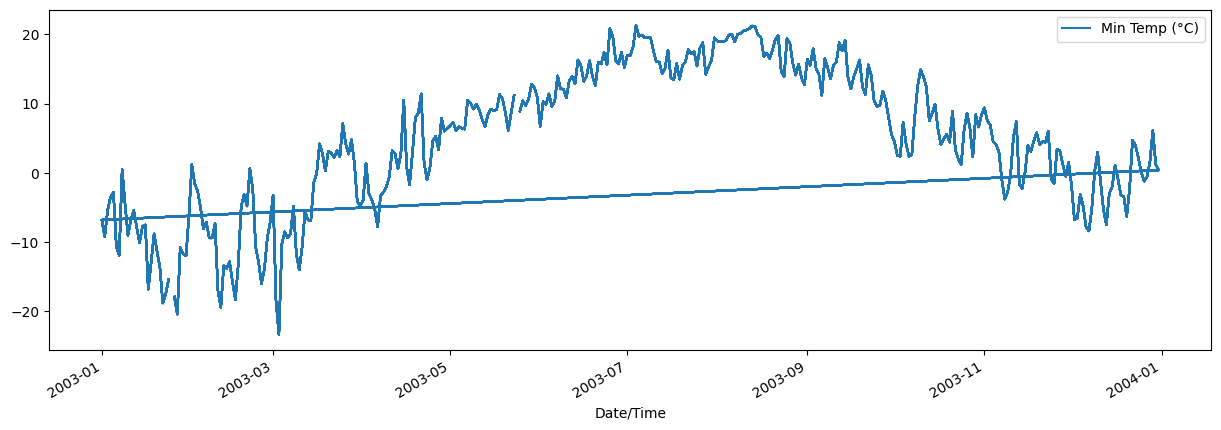

In [11]:
# Ploting Min temperature
single_f.plot(y="Min Temp (°C)", figsize=(15, 5))

In [27]:
# For all files
df = pd.concat(
    (pd.read_csv(f, index_col="Date/Time", parse_dates=True) for f in files)
)
df.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
Date/Time,,,,,,,,,,,,,,,,,,,,,
2003-01-01,-79.4,43.67,TORONTO CITY,6158355,2003,1,1,NaN,1.6,NaN,...,NaN,M,0.0,NaN,1.0,NaN,NaN,M,NaN,M
2003-01-02,-79.4,43.67,TORONTO CITY,6158355,2003,1,2,NaN,-4.1,NaN,...,NaN,M,4.3,NaN,1.0,NaN,NaN,M,NaN,M
2003-01-03,-79.4,43.67,TORONTO CITY,6158355,2003,1,3,NaN,0.4,NaN,...,NaN,M,14.6,NaN,9.0,NaN,NaN,M,NaN,M
2003-01-04,-79.4,43.67,TORONTO CITY,6158355,2003,1,4,NaN,-0.6,NaN,...,NaN,M,1.6,NaN,17.0,NaN,NaN,M,NaN,M
2003-01-05,-79.4,43.67,TORONTO CITY,6158355,2003,1,5,NaN,-0.9,NaN,...,NaN,M,0.0,NaN,17.0,NaN,NaN,M,NaN,M


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92040 entries, 2003-01-01 to 2023-12-31
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Longitude (x)              92040 non-null  float64
 1   Latitude (y)               92040 non-null  float64
 2   Station Name               92040 non-null  object 
 3   Climate ID                 92040 non-null  int64  
 4   Year                       92040 non-null  int64  
 5   Month                      92040 non-null  int64  
 6   Day                        92040 non-null  int64  
 7   Data Quality               0 non-null      float64
 8   Max Temp (°C)              91248 non-null  float64
 9   Max Temp Flag              1152 non-null   object 
 10  Min Temp (°C)              91512 non-null  float64
 11  Min Temp Flag              1236 non-null   object 
 12  Mean Temp (°C)             91128 non-null  float64
 13  Mean Temp Flag             12

<Axes: xlabel='Date/Time'>

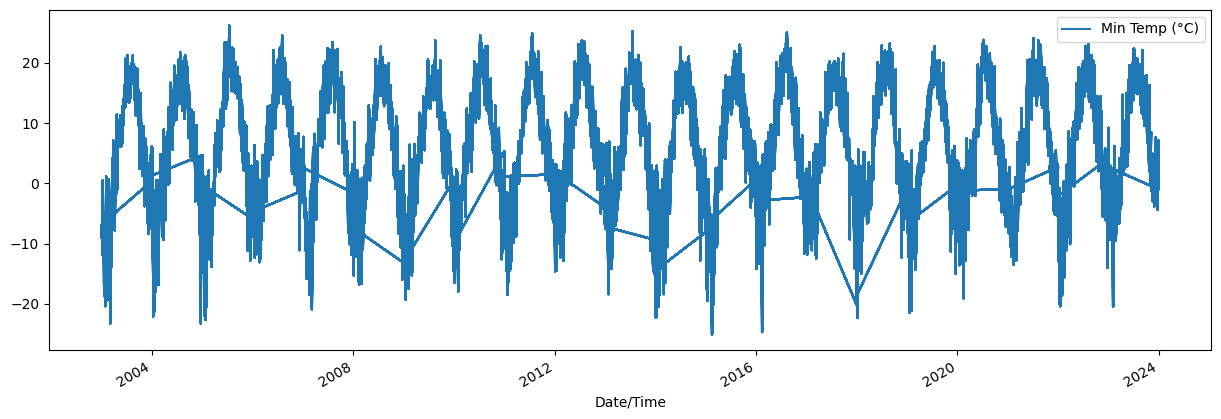

In [29]:
df.plot(y="Min Temp (°C)", figsize=(15, 5))

In [30]:
# Drop columns not needed
df.dropna(axis=1, how="all", inplace=True)  # Columns with all NA
df.drop(df.columns[df.columns.str.contains("Flag")], axis=1, inplace=True)  # Columns with "Flag"
df.drop(["Total Rain (mm)", "Snow on Grnd (cm)"], axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92040 entries, 2003-01-01 to 2023-12-31
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Longitude (x)       92040 non-null  float64
 1   Latitude (y)        92040 non-null  float64
 2   Station Name        92040 non-null  object 
 3   Climate ID          92040 non-null  int64  
 4   Year                92040 non-null  int64  
 5   Month               92040 non-null  int64  
 6   Day                 92040 non-null  int64  
 7   Max Temp (°C)       91248 non-null  float64
 8   Min Temp (°C)       91512 non-null  float64
 9   Mean Temp (°C)      91128 non-null  float64
 10  Heat Deg Days (°C)  91128 non-null  float64
 11  Cool Deg Days (°C)  91128 non-null  float64
 12  Total Precip (mm)   90024 non-null  float64
dtypes: float64(8), int64(4), object(1)
memory usage: 9.8+ MB


In [43]:
# List of columns to interpolate
columns_to_interpolate = ["Max Temp (°C)", "Min Temp (°C)", "Mean Temp (°C)", 
                          "Heat Deg Days (°C)", "Cool Deg Days (°C)", "Total Precip (mm)"]

# Interpolate the missing values in each column
for column in columns_to_interpolate:
    df[column] = df[column].interpolate()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92040 entries, 2003-01-01 to 2023-12-31
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Longitude (x)       92040 non-null  float64
 1   Latitude (y)        92040 non-null  float64
 2   Station Name        92040 non-null  object 
 3   Climate ID          92040 non-null  int64  
 4   Year                92040 non-null  int64  
 5   Month               92040 non-null  int64  
 6   Day                 92040 non-null  int64  
 7   Max Temp (°C)       92040 non-null  float64
 8   Min Temp (°C)       92040 non-null  float64
 9   Mean Temp (°C)      92040 non-null  float64
 10  Heat Deg Days (°C)  92040 non-null  float64
 11  Cool Deg Days (°C)  92040 non-null  float64
 12  Total Precip (mm)   92040 non-null  float64
dtypes: float64(8), int64(4), object(1)
memory usage: 9.8+ MB


In [45]:
# Sort by index
df.sort_index(inplace=True)

<Axes: xlabel='Date/Time'>

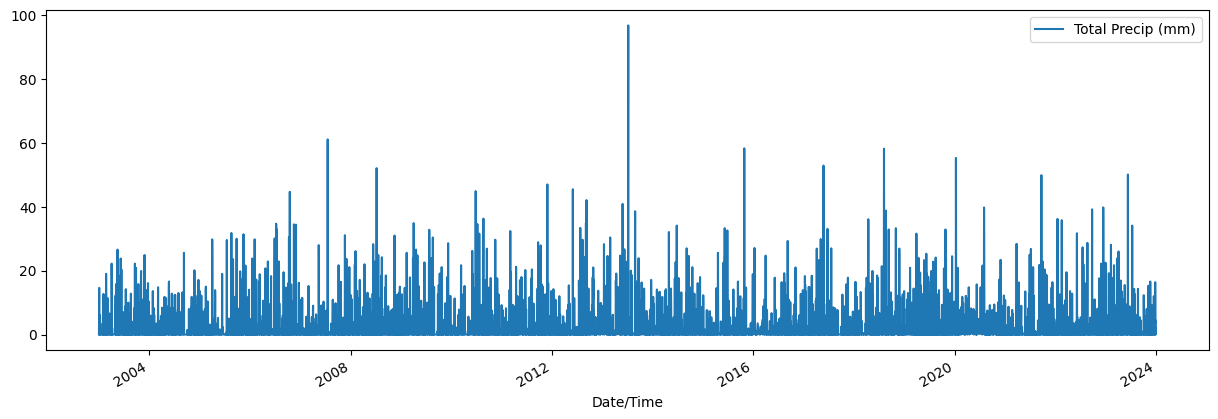

In [47]:
df.plot(y="Total Precip (mm)", figsize=(15, 5))